# This notebook is about feature engineering with sentiment analysis and classification

#### Load useful libraries and df

In [8]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


from tqdm import tqdm

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /Users/janice/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/janice/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [9]:
# Load df
df = pd.read_csv(
    "../data/chatgpt_short_clean_en.csv",
    encoding="utf-8",
)

In [10]:
df.shape

(21352, 17)

In [11]:
from transformers import pipeline
#import torch

In [12]:
classifier = pipeline("zero-shot-classification")

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [13]:
#candidate_labels = ["feature evaluation", "praise", "bug report", "feature request", "performance", "usage"]
candidate_labels = ["positive", "neutral", "negative"]
hypothesis_template = "The sentiment of this review is {}."

In [14]:
#candidate_labels = list(category_map.values())
predictedCategories = []
ScoreNegative = []
ScoreNeutral = []
ScorePositive = []

for i in tqdm(range(len(df))): # len(df)
    text = df.iloc[i,]['content']
    res = classifier(text, candidate_labels, hypothesis_template=hypothesis_template, multi_label=True)
    labels = res['labels'] 
    scores = res['scores'] #extracting the scores associated with the labels
    res_dict = {label : score for label,score in zip(labels, scores)}
    sorted_dict = dict(sorted(res_dict.items(), key=lambda x:x[1],reverse = True)) #sorting the dictionary of labels in descending order based on their score
    categories  = next(k for i, (k,v) in enumerate(sorted_dict.items()))

    ScorePositive.append(sorted_dict['positive'])
    ScoreNeutral.append(sorted_dict['neutral'])
    ScoreNegative.append(sorted_dict['negative'])
    predictedCategories.append(categories)

  0%|          | 0/21352 [00:00<?, ?it/s]

100%|██████████| 21352/21352 [5:46:50<00:00,  1.03it/s]  


In [15]:
df_zero_prep = pd.DataFrame({  'category': predictedCategories, 
                                    'positive_score': ScorePositive, 
                                    'neutral_score': ScoreNeutral, 
                                    'negative_score': ScoreNegative})
df_zero = pd.merge(df, df_zero_prep, left_index=True, right_index=True)

In [16]:
df_zero

,Unnamed: 0,reviewId,userName,content,score,thumbsUpCount,at,replyContent,repliedAt,appVersion,...,at_q,at_ym,at_m,at_wd,score_cat,detected_language,category,positive_score,neutral_score,negative_score
0,0,36b7f28e-151d-4b98-8a13-41bd017e0d25,Lin Cheng,chatgpt on android is a solid app with seamles...,4,5,2023-10-19 19:26:19,NaN,NaN,1.2023.284,...,4,2023-10,October,Thursday,neutral,en,positive,0.993198,0.068540,0.002369
1,1,2bc253b6-c804-47e9-b6f2-3a21027efab4,Alim,i've been using chatgpt for a while but i've j...,5,139,2023-09-29 20:24:38,NaN,NaN,1.2023.263,...,3,2023-09,September,Friday,positive,en,positive,0.994487,0.061399,0.000494
2,2,5f084727-ab85-40b3-bd42-a7a49502fc1f,Theo Healy,the chatgpt android app has completely blown m...,4,247,2023-07-28 10:29:10,NaN,NaN,1.0.0023,...,3,2023-07,July,Friday,neutral,en,positive,0.999619,0.043285,0.000417
3,3,5df90de5-b8e2-4dc2-b6ff-520aa3a25eae,Elliot Limberg,no subscription free and accurate unbiased ans...,5,272,2023-07-30 19:38:37,NaN,NaN,1.0.0023,...,3,2023-07,July,Sunday,positive,en,positive,0.998958,0.952186,0.000676
4,4,bb66c666-865d-4a31-b27f-4933df3ff829,Phoebe Moraes,i use this app for learning languages which ch...,4,126,2023-08-09 18:23:33,NaN,NaN,1.0.0030,...,3,2023-08,August,Wednesday,neutral,en,neutral,0.177005,0.264018,0.035760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21347,30912,6bed36cc-bc58-479e-b395-6644d15adeb8,Yeamin Hossain (Limon),first review,5,0,2023-07-25 17:47:09,NaN,NaN,NaN,...,3,2023-07,July,Tuesday,positive,en,positive,0.816886,0.671854,0.675763
21348,30916,2ecc7803-920c-4f95-8b15-db9c7b1caa8a,Sarvesh Soni,first downloaded,5,0,2023-07-25 17:08:33,NaN,NaN,NaN,...,3,2023-07,July,Tuesday,positive,en,positive,0.888082,0.590217,0.632305
21349,30918,0530373c-1bfc-45d2-9dec-9fc0bb9cff4d,mostafijur rahman,usually app,5,0,2023-07-25 17:15:19,NaN,NaN,NaN,...,3,2023-07,July,Tuesday,positive,en,positive,0.846591,0.450016,0.367502
21350,30921,4775c835-38dd-48b8-8bf0-c3f38fe8794d,Carter Gledhill,first comment,5,0,2023-07-25 21:05:55,NaN,NaN,NaN,...,3,2023-07,July,Tuesday,positive,en,positive,0.815224,0.392924,0.659263


In [17]:
df_zero.groupby('category').mean('category')

,Unnamed: 0,score,thumbsUpCount,at_q,positive_score,neutral_score,negative_score
category,,,,,,,
negative,9885.360303,2.413401,1.360809,3.142099,0.068725,0.328319,0.868775
neutral,10241.694779,3.895582,1.146586,3.148594,0.302813,0.637571,0.242118
positive,12084.904373,4.777206,1.176815,3.184390,0.960109,0.171645,0.023284


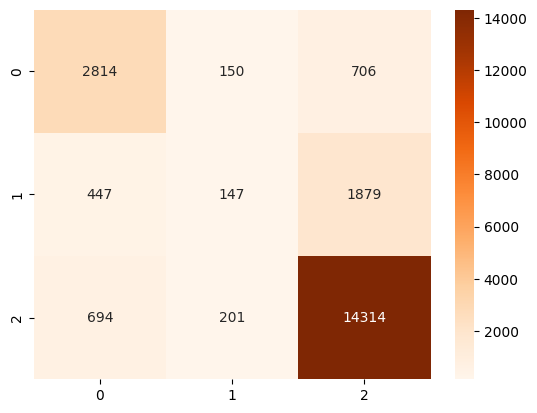

In [18]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


#Confusion matrix using pandas crosstab
conf_matrix = confusion_matrix(df_zero.score_cat, df_zero.category)
sns.heatmap(conf_matrix, annot=True, cmap=plt.cm.Oranges, fmt='g'); 

In [19]:
df_zero.to_csv("/Users/janice/Documents/Bootcamp/Git/Capstone/capstone_chat-gpt/data/ChatGPT-play-reviews-zero.csv", index=False)

## VADER (Valence Aware Dictionary for Sentiment Reasoning)

Good to know:

VADER (Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. It is available in the NLTK package and can be applied directly to unlabeled text data.

VADER sentimental analysis relies on a dictionary that maps lexical features to emotion intensities known as sentiment scores. The sentiment score of a text can be obtained by summing up the intensity of each word in the text.

For example, Words like ‘love’, ‘enjoy’, ‘happy’, ‘like’ all convey a positive sentiment. Also VADER is intelligent enough to understand the basic context of these words, such as “did not love” as a negative statement. It also understands the emphasis of capitalization and punctuation, such as “ENJOY”

Following code was inspired by the VADER documentation on Git:
https://github.com/cjhutto/vaderSentiment#code-examples

In [20]:
df_zero = pd.read_csv("../data/ChatGPT-play-reviews-zero.csv",
                            encoding="utf-8",
                        )

df_zero.shape

(21352, 21)

In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    #note: depending on how you installed (e.g., using source code download versus pip install), you may need to import like this:
    #from vaderSentiment import SentimentIntensityAnalyzer

In [22]:
from nltk import tokenize

#candidate_labels = list(category_map.values())
vad_cat = []
vad_neg = []
vad_neu = []
vad_pos = []

for sentence in tqdm(df_zero['content']):
     sid = SentimentIntensityAnalyzer()
     ss = sid.polarity_scores(sentence)
     for k in sorted(ss):
         vad_cat.append(max(ss, key=ss.get))
         vad_neg.append(ss['neg'])
         vad_neu.append(ss['neu'])
         vad_pos.append(ss['pos'])

100%|██████████| 21352/21352 [02:47<00:00, 127.64it/s]


In [23]:
df_vader_prep = pd.DataFrame({ 'vader_cat': vad_cat, 
                                'vader_neg': vad_neg, 
                                'vader_neu': vad_neu, 
                                'vader_pos': vad_pos})
df_vader= pd.merge(df_zero, df_vader_prep, left_index=True, right_index=True)

In [24]:
df_vader.to_csv("/Users/janice/Documents/Bootcamp/Git/Capstone/capstone_chat-gpt/data/ChatGPT-play-reviews-zero_vader.csv", index=False)

## Sentiment Analysis using TextBlob

In [25]:
from textblob import TextBlob

Polarity determines the sentiment of the text. Its values lie in [-1,1] where -1 denotes a highly negative sentiment and 1 denotes a highly positive sentiment.

Subjectivity determines whether a text input is factual information or a personal opinion. Its value lies between [0,1] where a value closer to 0 denotes a piece of factual information and a value closer to 1 denotes a personal opinion.

In [26]:
#candidate_labels = list(category_map.values())
blob_polarity = []
blob_subjectivity = []

for sentence in tqdm(df['content']):
     blob_polarity.append(TextBlob(sentence).sentiment.polarity)
     blob_subjectivity.append(TextBlob(sentence).sentiment.subjectivity)

100%|██████████| 21352/21352 [00:05<00:00, 3973.63it/s]


In [27]:
df_blob_prep = pd.DataFrame({ 'blob_polarity': blob_polarity, 
                                    'blob_subjectivity': blob_subjectivity})
df_blob= pd.merge(df_vader, df_blob_prep, left_index=True, right_index=True)

In [28]:
df_blob.to_csv("../data/ChatGPT-play-reviews-sentiment.csv", index=False)

## Sentiment Analysis using Transformer-Based Models

In [29]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [30]:
#candidate_labels = list(category_map.values())
pipe_cat = []
pipe_neg = []
pipe_pos = []

for sentence in tqdm(df['content']):
     res = sentiment_pipeline(sentence)
     if res[0]['label'] == 'POSITIVE':
          pipe_cat.append('POSITIVE')
          pipe_neg.append(1-res[0]['score'])
          pipe_pos.append(res[0]['score'])
     elif res[0]['label'] == 'NEGATIVE':
          pipe_cat.append('NEGATIVE')
          pipe_neg.append(res[0]['score'])
          pipe_pos.append(1-res[0]['score'])

100%|██████████| 21352/21352 [13:15:16<00:00,  2.23s/it]    


In [31]:
df_pipe_prep = pd.DataFrame({ 'pipe_cat': pipe_cat, 
                                    'pipe_neg': pipe_neg, 
                                    'pipe_pos': pipe_pos})

# Load df
df_blob = pd.read_csv(
    "../data/ChatGPT-play-reviews-sentiment.csv"
)

df_pipe= pd.merge(df_blob, df_pipe_prep, left_index=True, right_index=True)

In [32]:
df_blob.shape

(21352, 27)

In [33]:
df_pipe.to_csv("../data/ChatGPT-play-reviews_sentiment.csv", index=False)

In [34]:
# Load df
df_pipe = pd.read_csv(
    "../data/ChatGPT-play-reviews_sentiment.csv"
)

In [37]:
df_pipe

,Unnamed: 0,reviewId,userName,content,score,thumbsUpCount,at,replyContent,repliedAt,appVersion,...,negative_score,vader_cat,vader_neg,vader_neu,vader_pos,blob_polarity,blob_subjectivity,pipe_cat,pipe_neg,pipe_pos
0,0,36b7f28e-151d-4b98-8a13-41bd017e0d25,Lin Cheng,chatgpt on android is a solid app with seamles...,4,5,2023-10-19 19:26:19,NaN,NaN,1.2023.284,...,0.002369,neu,0.030,0.891,0.079,0.069048,0.366667,NEGATIVE,0.745451,0.254549
1,1,2bc253b6-c804-47e9-b6f2-3a21027efab4,Alim,i've been using chatgpt for a while but i've j...,5,139,2023-09-29 20:24:38,NaN,NaN,1.2023.263,...,0.000494,neu,0.030,0.891,0.079,0.317063,0.618452,NEGATIVE,0.997383,0.002617
2,2,5f084727-ab85-40b3-bd42-a7a49502fc1f,Theo Healy,the chatgpt android app has completely blown m...,4,247,2023-07-28 10:29:10,NaN,NaN,1.0.0023,...,0.000417,neu,0.030,0.891,0.079,0.439583,0.606250,POSITIVE,0.000360,0.999640
3,3,5df90de5-b8e2-4dc2-b6ff-520aa3a25eae,Elliot Limberg,no subscription free and accurate unbiased ans...,5,272,2023-07-30 19:38:37,NaN,NaN,1.0.0023,...,0.000676,neu,0.030,0.891,0.079,0.296528,0.552778,POSITIVE,0.000836,0.999164
4,4,bb66c666-865d-4a31-b27f-4933df3ff829,Phoebe Moraes,i use this app for learning languages which ch...,4,126,2023-08-09 18:23:33,NaN,NaN,1.0.0030,...,0.035760,compound,0.012,0.773,0.215,0.300390,0.347403,POSITIVE,0.026764,0.973236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21347,30912,6bed36cc-bc58-479e-b395-6644d15adeb8,Yeamin Hossain (Limon),first review,5,0,2023-07-25 17:47:09,NaN,NaN,NaN,...,0.675763,compound,0.000,0.614,0.386,0.250000,0.333333,POSITIVE,0.003007,0.996993
21348,30916,2ecc7803-920c-4f95-8b15-db9c7b1caa8a,Sarvesh Soni,first downloaded,5,0,2023-07-25 17:08:33,NaN,NaN,NaN,...,0.632305,neu,0.000,0.696,0.304,0.250000,0.333333,POSITIVE,0.110960,0.889040
21349,30918,0530373c-1bfc-45d2-9dec-9fc0bb9cff4d,mostafijur rahman,usually app,5,0,2023-07-25 17:15:19,NaN,NaN,NaN,...,0.367502,neu,0.000,0.696,0.304,-0.250000,0.250000,POSITIVE,0.028938,0.971062
21350,30921,4775c835-38dd-48b8-8bf0-c3f38fe8794d,Carter Gledhill,first comment,5,0,2023-07-25 21:05:55,NaN,NaN,NaN,...,0.659263,neu,0.000,0.696,0.304,0.250000,0.333333,POSITIVE,0.049670,0.950330
